In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv('/content/student_dataset.csv')
df

,Name,GPA,Extracurriculars,Parental Income,Study Hours,Entrance Test,Distance (km),Internet,Final Result
0,Alice,2.04,Yes,47574,2.5,78,7.1,Yes,Pass
1,Bob,3.59,Yes,75084,1.8,53,9.2,Yes,Fail
2,Charlie,3.26,No,24957,1.0,51,8.9,No,Fail
3,David,2.36,No,70419,2.5,73,13.7,Yes,Pass
4,Eva,2.88,Yes,56010,4.6,55,1.3,No,Fail
5,Frank,3.60,No,78025,2.4,61,0.6,Yes,Fail
6,Grace,3.40,No,39113,1.7,72,14.1,Yes,Pass
7,Hannah,2.19,No,23409,5.6,83,16.1,Yes,Fail
8,Ian,3.80,Yes,69131,1.0,83,5.2,Yes,Fail
9,Jasmine,3.92,No,44768,4.1,70,10.9,No,Pass


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              20 non-null     object 
 1   GPA               20 non-null     float64
 2   Extracurriculars  20 non-null     object 
 3   Parental Income   20 non-null     int64  
 4   Study Hours       20 non-null     float64
 5   Entrance Test     20 non-null     int64  
 6   Distance (km)     20 non-null     float64
 7   Internet          20 non-null     object 
 8   Final Result      20 non-null     object 
dtypes: float64(3), int64(2), object(4)
memory usage: 1.5+ KB


In [22]:
internet = LabelEncoder()
df["Internet"] = internet.fit_transform(df["Internet"])

In [23]:
result = LabelEncoder()
df["Final Result"] = result.fit_transform(df["Final Result"])

In [24]:
extracurriculars_encoder = LabelEncoder()
df["Extracurriculars"] = extracurriculars_encoder.fit_transform(df["Extracurriculars"])

In [25]:
input = df.drop(columns=["Name", "Final Result"])
output = df["Final Result"]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(input, output, test_size=0.2, random_state=42)

In [27]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [28]:
input_data = pd.DataFrame([[9.2, 5, 200000, 14, 82, 10.5, 1]],
                          columns=['GPA', 'Extracurriculars', 'Parental Income',
                                   'Study Hours', 'Entrance Test',
                                   'Distance (km)', 'Internet'])
prediction = model.predict(input_data)
predicted = result.inverse_transform(prediction)
print("Predicted Result", predicted)

Predicted Result ['Pass']


In [29]:
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy of the Decision Tree Classifier: {accuracy:.2f}")


Accuracy of the Decision Tree Classifier: 0.50


In [30]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.50      0.50      0.50         2

    accuracy                           0.50         4
   macro avg       0.50      0.50      0.50         4
weighted avg       0.50      0.50      0.50         4



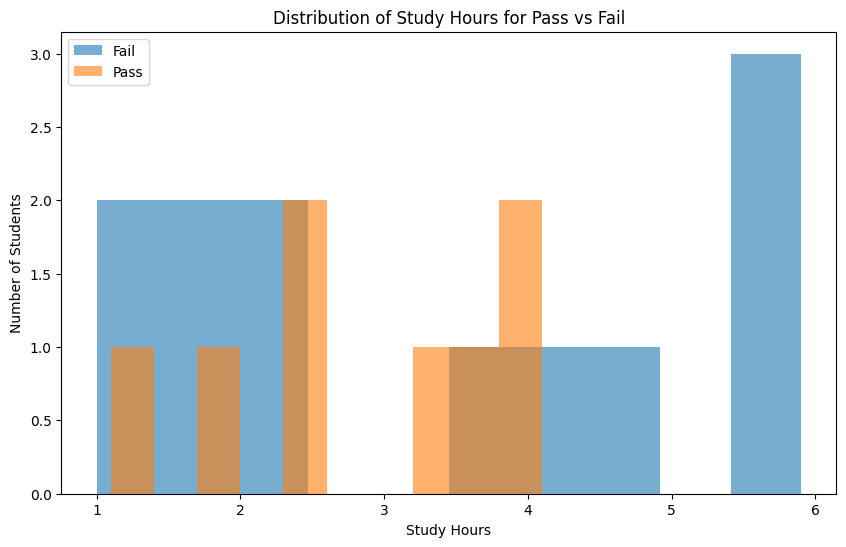

In [34]:
plt.figure(figsize=(10, 6))
for result_val, result_name in zip([0, 1], ["Fail", "Pass"]):
    subset = df[df["Final Result"] == result_val]
    plt.hist(subset["Study Hours"], bins=10, alpha=0.6, label=result_name)

plt.xlabel("Study Hours")
plt.ylabel("Number of Students")
plt.title("Distribution of Study Hours for Pass vs Fail")
plt.legend()
plt.show()


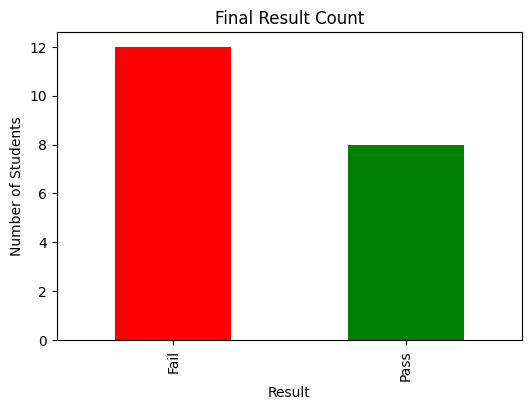

In [38]:
df['Final Result Label'] = df['Final Result'].map({0: 'Fail', 1: 'Pass'})

plt.figure(figsize=(6, 4))
df['Final Result Label'].value_counts().plot(kind='bar', color=['red', 'green'])
plt.title("Final Result Count")
plt.xlabel("Result")
plt.ylabel("Number of Students")
plt.show()
